train compile 단계에서 고려할 3가지

    1. loss function
    2. optimizer
    3. metrics

# ch. 3.4 IMDB dataset

In [7]:
import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb\
.load_data(num_words=10000)

In [14]:
print(f'''
train_data.shape : {train_data.shape}
test_data.shape : {test_data.shape}

train_labels.shape : {train_labels.shape}
test_labels.shape: : {test_labels.shape}
''')


train_data.shape : (25000,)
test_data.shape : (25000,)

train_labels.shape : (25000,)
test_labels.shape: : (25000,)



In [25]:
train_data[[0]]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [17]:
# 0 : 긍정 / 1 : 부정
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
# 원래 영어단어 사전 불러와서 mapping(decoding)
word_index = imdb.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_review = ' '.join([
    reverse_word_index.get(i - 3, '?') for i in train_data[0]
])


In [23]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 1 데이터 준비 (3.4.2)

- list to tensor (1D -> 2D)

    여기서는 one hot encoding 이용

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [28]:
print(f'''
x_train.shape : {x_train.shape}
x_test.shape : {x_test.shape}

y_train.shape : {y_train.shape}
y_test.shape: : {y_test.shape}
''')


x_train.shape : (25000, 10000)
x_test.shape : (25000, 10000)

y_train.shape : (25000,)
y_test.shape: : (25000,)



## 2 모델 정의.

1. Affine - Relu (hidden size = 16)
2. Affine - Relu (hidden size = 16)
3. Sigmoid

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 3 모델 컴파일

1. optimizer : rmsprop
2. loss : binary_crossentropy
3. metrics : accuracy

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 4 훈련 검증

In [42]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
x_val.shape, partial_x_train.shape

((10000, 10000), (15000, 10000))

In [56]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4, # 20
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 83ms/step - loss: 0.0065 - binary_accuracy: 0.9993 - val_loss: 0.7048 - val_binary_accuracy: 0.8649
Epoch 2/4
30/30 [==============================] - 1s 27ms/step - loss: 0.0035 - binary_accuracy: 0.9998 - val_loss: 0.7477 - val_binary_accuracy: 0.8638
Epoch 3/4
30/30 [==============================] - 1s 26ms/step - loss: 0.0042 - binary_accuracy: 0.9993 - val_loss: 0.7904 - val_binary_accuracy: 0.8636
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.0019 - binary_accuracy: 0.9999 - val_loss: 0.8291 - val_binary_accuracy: 0.8631


In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

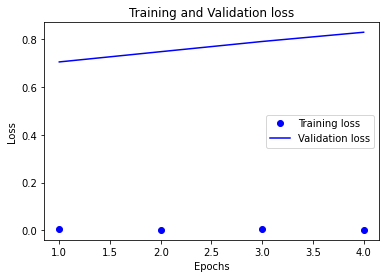

In [58]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

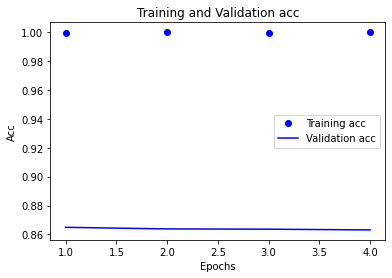

In [59]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [60]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8940 - binary_accuracy: 0.8481


In [61]:
results # test loss / test accuracy

[0.8940105438232422, 0.8481199741363525]